In [1]:
# importing libraries
import numpy as np
import jax.numpy as jnp
import pandas as pd

In [2]:
# mounting the dataset and installing lightweight_mmm
from google.colab import drive
drive.mount('/content/drive')
!pip install lightweight_mmm
# !pip install git+https://github.com/arviz-devs/arviz

Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 KB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.7/292.7 KB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 67.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.0/285.0 KB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 KB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 11.9 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installati

In [3]:
# import libraries needed
from lightweight_mmm import lightweight_mmm
from lightweight_mmm import optimize_media
from lightweight_mmm import plot
from lightweight_mmm import preprocessing
from lightweight_mmm import utils

### **Transforming the data for modelling**

In [4]:
df = pd.read_csv('/content/drive/MyDrive/haensel-ams/MMM_test_data.csv', sep=',', parse_dates=["start_of_week"])
df = df.sort_values('start_of_week').fillna(0).reset_index().drop(columns="index", errors = "ignore")

media_data = df[["spend_channel_1", "spend_channel_2", "spend_channel_3", "spend_channel_4", "spend_channel_5", "spend_channel_6", "spend_channel_7"]].to_numpy()
target = df[["revenue"]].to_numpy()
costs = df[["spend_channel_1", "spend_channel_2", "spend_channel_3", "spend_channel_4", "spend_channel_5", "spend_channel_6", "spend_channel_7"]].sum().to_numpy()

split_point = df.shape[0]-15

media_data_train = media_data[:split_point, ...]
target_train = target[:split_point].reshape(-1)

media_data_test = media_data[split_point:, ...]

media_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)
target_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)
cost_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)

media_data_train = media_scaler.fit_transform(media_data_train)
target_train = target_scaler.fit_transform(target_train)
costs = cost_scaler.fit_transform(costs)

In [5]:
mmm = lightweight_mmm.LightweightMMM(model_name = "adstock")
mmm.fit(media=media_data_train,
        media_prior=costs,
        target=target_train,
        number_warmup=100,
        number_samples=100,
        number_chains=1)

sample: 100%|██████████| 200/200 [00:10<00:00, 19.89it/s, 255 steps of size 1.30e-02. acc. prob=0.92]


In [6]:
mmm.print_summary()


                            mean       std    median      5.0%     95.0%     n_eff     r_hat
         coef_media[0]      0.05      0.05      0.04      0.00      0.11     86.85      1.00
         coef_media[1]      0.04      0.02      0.03      0.00      0.07     83.74      0.99
         coef_media[2]      0.31      0.19      0.32      0.00      0.54     10.66      1.03
         coef_media[3]      0.37      0.35      0.27      0.01      0.83     42.40      0.99
         coef_media[4]      0.15      0.13      0.13      0.00      0.27     91.24      0.99
         coef_media[5]      0.14      0.12      0.13      0.01      0.24     40.39      1.00
         coef_media[6]      2.26      1.83      2.05      0.15      4.72     15.49      1.02
         coef_trend[0]     -0.16      0.12     -0.13     -0.33     -0.01     18.08      1.00
            expo_trend      0.58      0.08      0.54      0.50      0.70     23.30      1.01
           exponent[0]      0.90      0.08      0.92      0.79      1

In [7]:
# downgrading to matplotlib version 3.1.3 as this is compatible with lightweight_mmm
!python -m pip uninstall matplotlib
!pip install matplotlib==3.1.3

Found existing installation: matplotlib 3.6.1
Uninstalling matplotlib-3.6.1:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/matplotlib-3.6.1-py3.8-nspkg.pth
    /usr/local/lib/python3.8/dist-packages/matplotlib-3.6.1.dist-info/*
    /usr/local/lib/python3.8/dist-packages/matplotlib/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.8/dist-packages/pylab.py
Proceed (Y/n)? y
  Successfully uninstalled matplotlib-3.6.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 62.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the

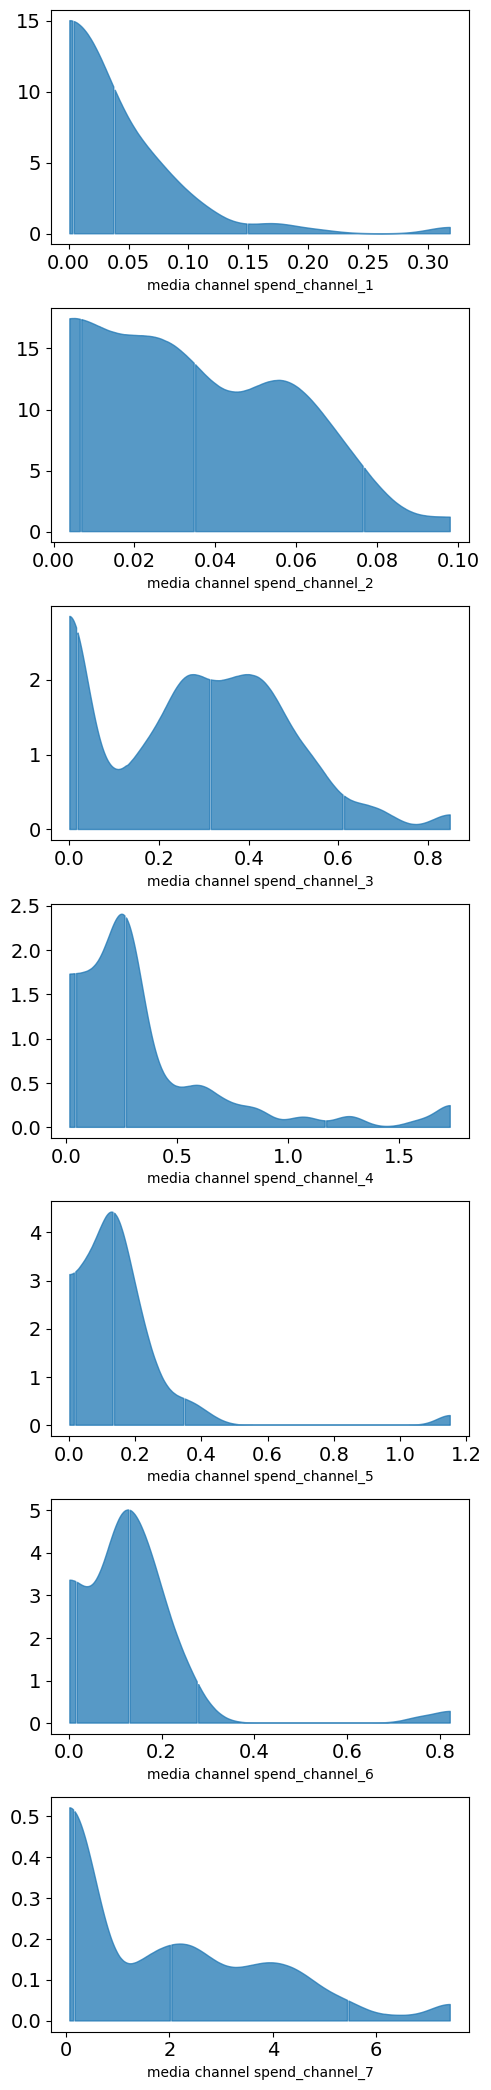

In [8]:
# plot the posterior distributions of the media effects for the mixed media model
channel_names = ["spend_channel_1", "spend_channel_2", "spend_channel_3", "spend_channel_4", "spend_channel_5", "spend_channel_6", "spend_channel_7"]
plot.plot_media_channel_posteriors(media_mix_model=mmm, channel_names=channel_names)

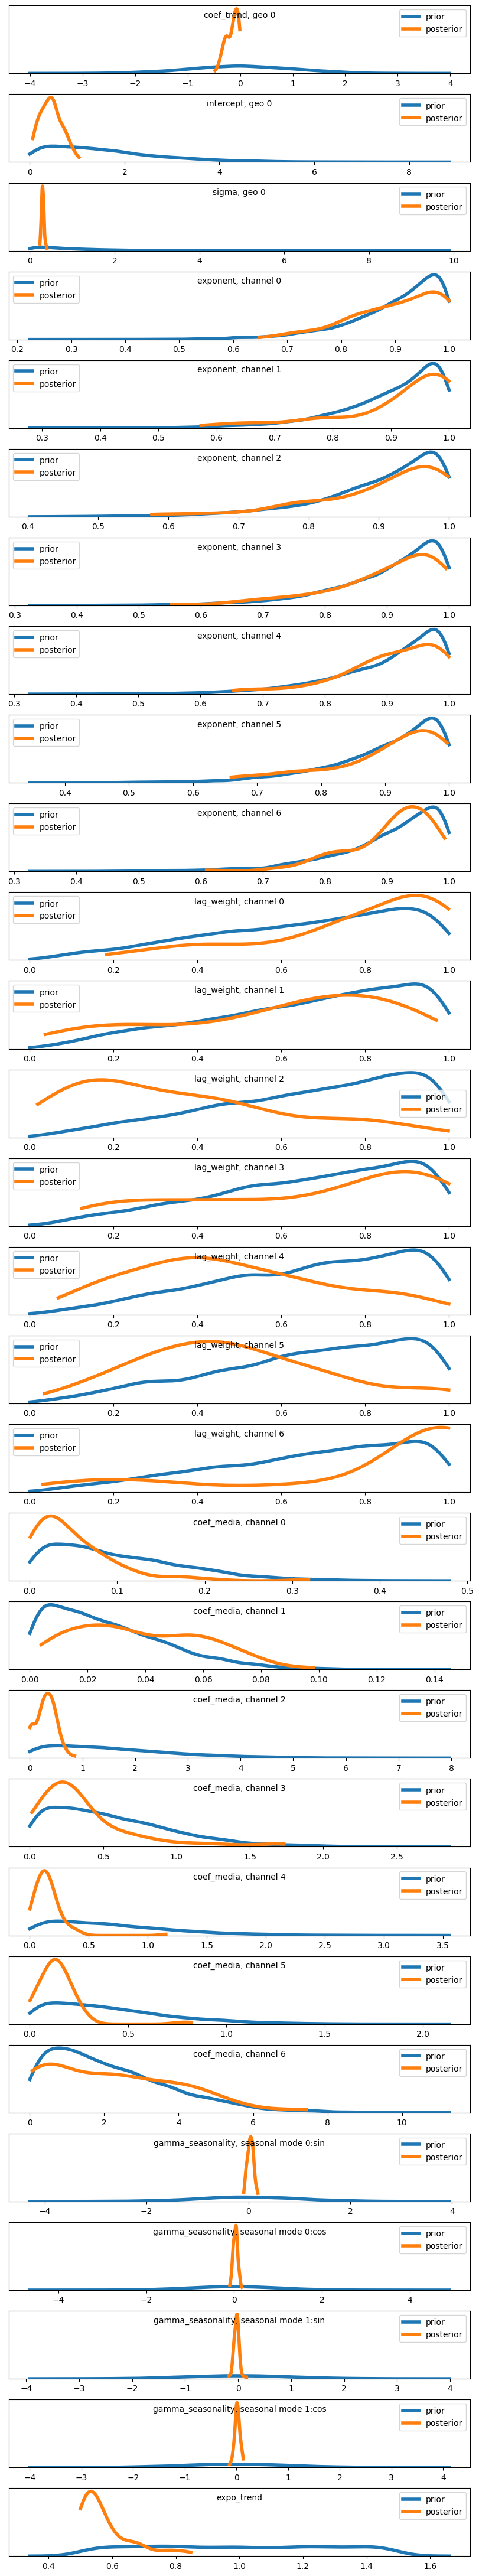

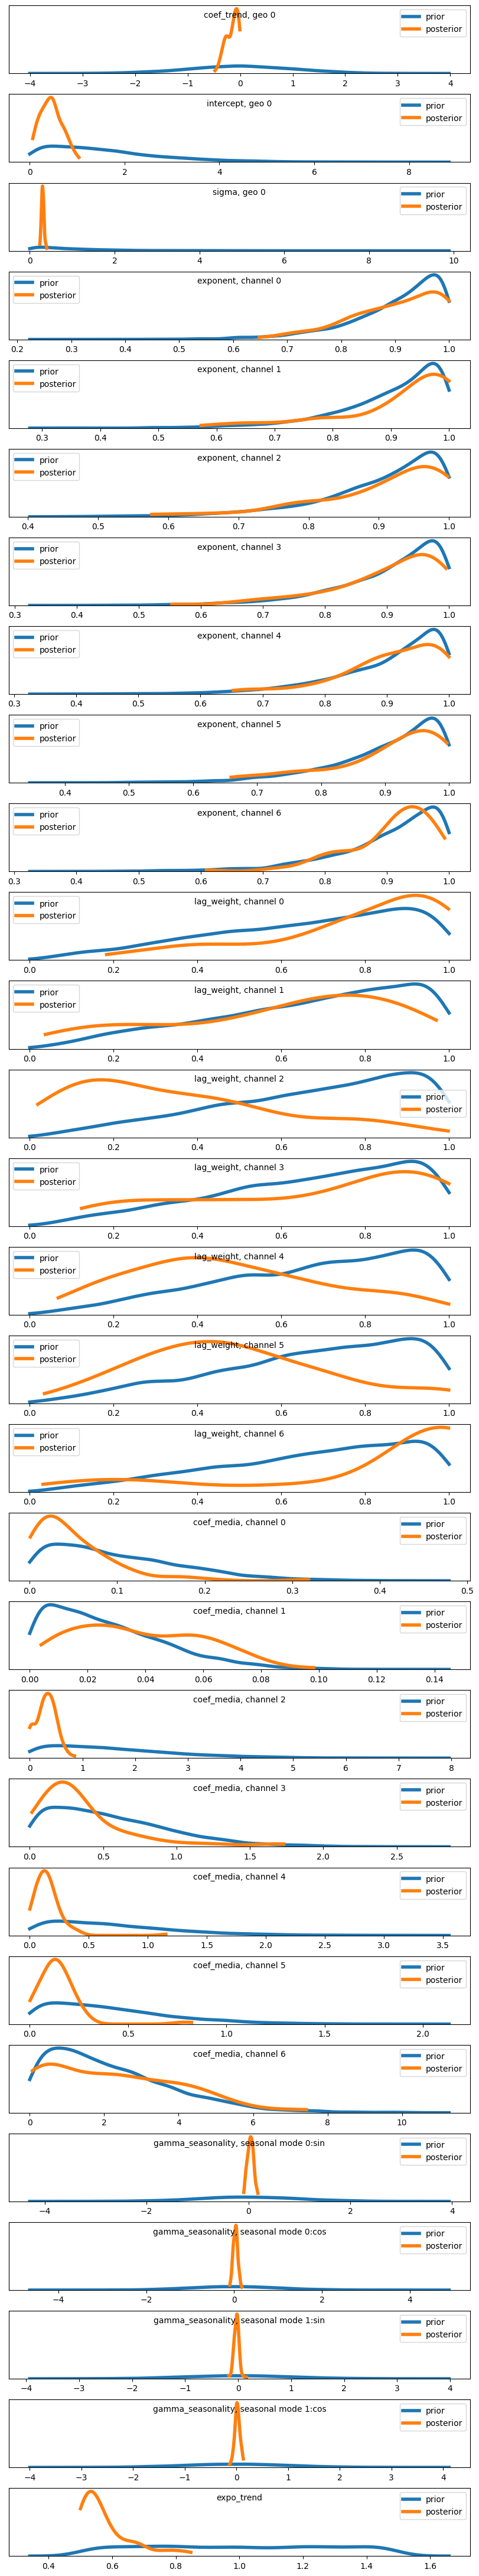

In [9]:
# plot the prior and posterior distributions for the mixed media model
plot.plot_prior_and_posterior(mmm)

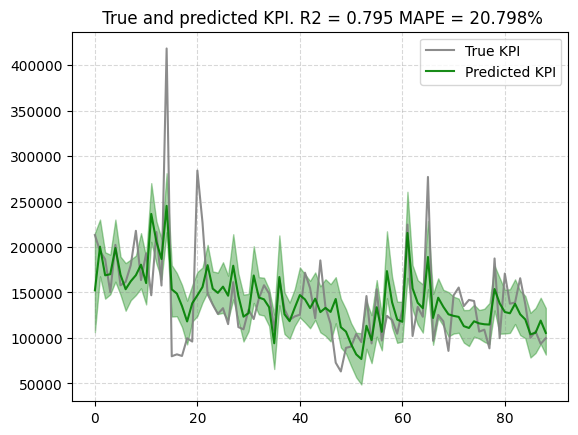

In [10]:
# check the model's prediction on training data
plot.plot_model_fit(mmm, target_scaler=target_scaler)

In [11]:
# making prediction on unseen test data
new_predictions = mmm.predict(media=media_scaler.transform(media_data_test))
new_predictions.shape

(100, 15)

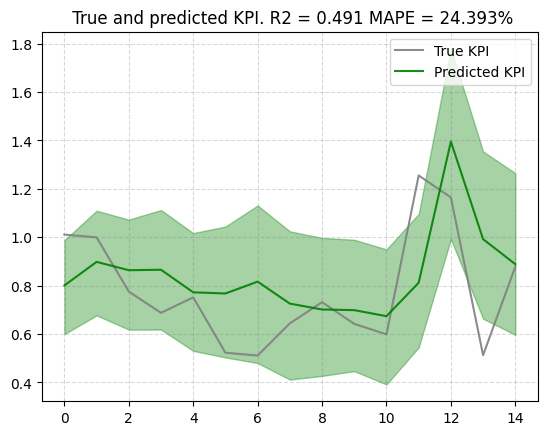

In [12]:
# check the model's prediction on unseen test data
target_test = target[split_point:].reshape(-1)
plot.plot_out_of_sample_model_fit(out_of_sample_predictions=new_predictions, out_of_sample_target=target_scaler.transform(target_test))

In [13]:
# estimate media effects with their respective credibility intervals
media_effect, roi_hat = mmm.get_posterior_metrics(target_scaler=target_scaler, cost_scaler=cost_scaler)

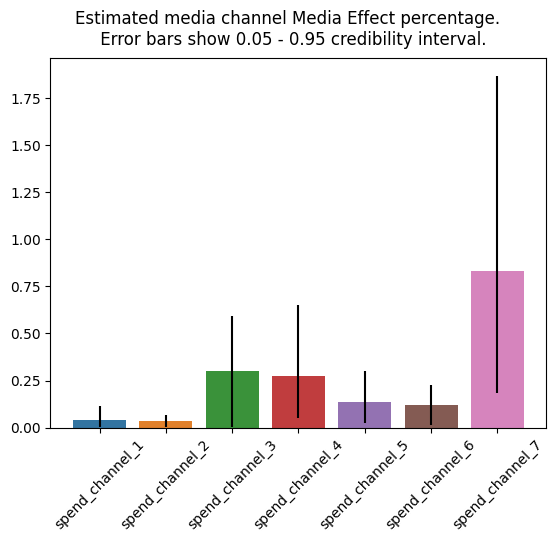

In [14]:
# plot media effects
plot.plot_bars_media_metrics(metric=media_effect, metric_name="Media Effect percentage", channel_names=channel_names)

### **Media Insights**

In [15]:
from matplotlib import pyplot as plt

def custom_plot_media_baseline_contribution_area_plot(media_mix_model, target_scaler=None, channel_names=None, fig_size = (20, 7)):
  """Area chart plot visualising weekly media and baseline contribution.

  Args:
    media_mix_model: Media mix model.
    target_scaler: Scalar used t oscale the target.
    cannel_names: Names of the media channel.
    fig_size: Size of the plot (matplotlib)

  Returns:
    Stacked area chart of weekly baseline effect.
  """
  # create media channels and baseline contribution dataframe.
  contribution_df = plot.create_media_baseline_contribution_df(media_mix_model=media_mix_model, target_scaler=target_scaler, channel_names=channel_names)
  contribution_df=contribution_df.clip(0)

  #  create contribution dataframe for plot.
  contribution_columns = [col for col in contribution_df.columns if "contribution" in col]
  contribution_df_for_plot = contribution_df.loc[:, contribution_columns]
  contribution_df_for_plot = contribution_df_for_plot[contribution_df_for_plot.columns[::-1]]
  period = np.arange(1, contribution_df_for_plot.shape[0]+1)
  contribution_df_for_plot.loc[:, "period"] = period

  #  plot stacked area chart.
  fig, ax = plt.subplots()
  contribution_df_for_plot.plot.area(x="period", stacked=True, figsize=fig_size, ax=ax)
  ax.set_title("Attribution over time", fontsize="x-large")
  ax.tick_params(axis = "y")
  ax.set_ylabel("Baseline and media channels attribution")
  ax.set_xlabel("Period")
  ax.set_xlim(1, contribution_df_for_plot["period"].max())
  ax.set_xticks(contribution_df_for_plot["period"])
  ax.set_xticklabels(contribution_df_for_plot["period"])
  for tick in ax.get_xticklabels():
    tick.set_rotation(45)
  plt.close()
  return fig


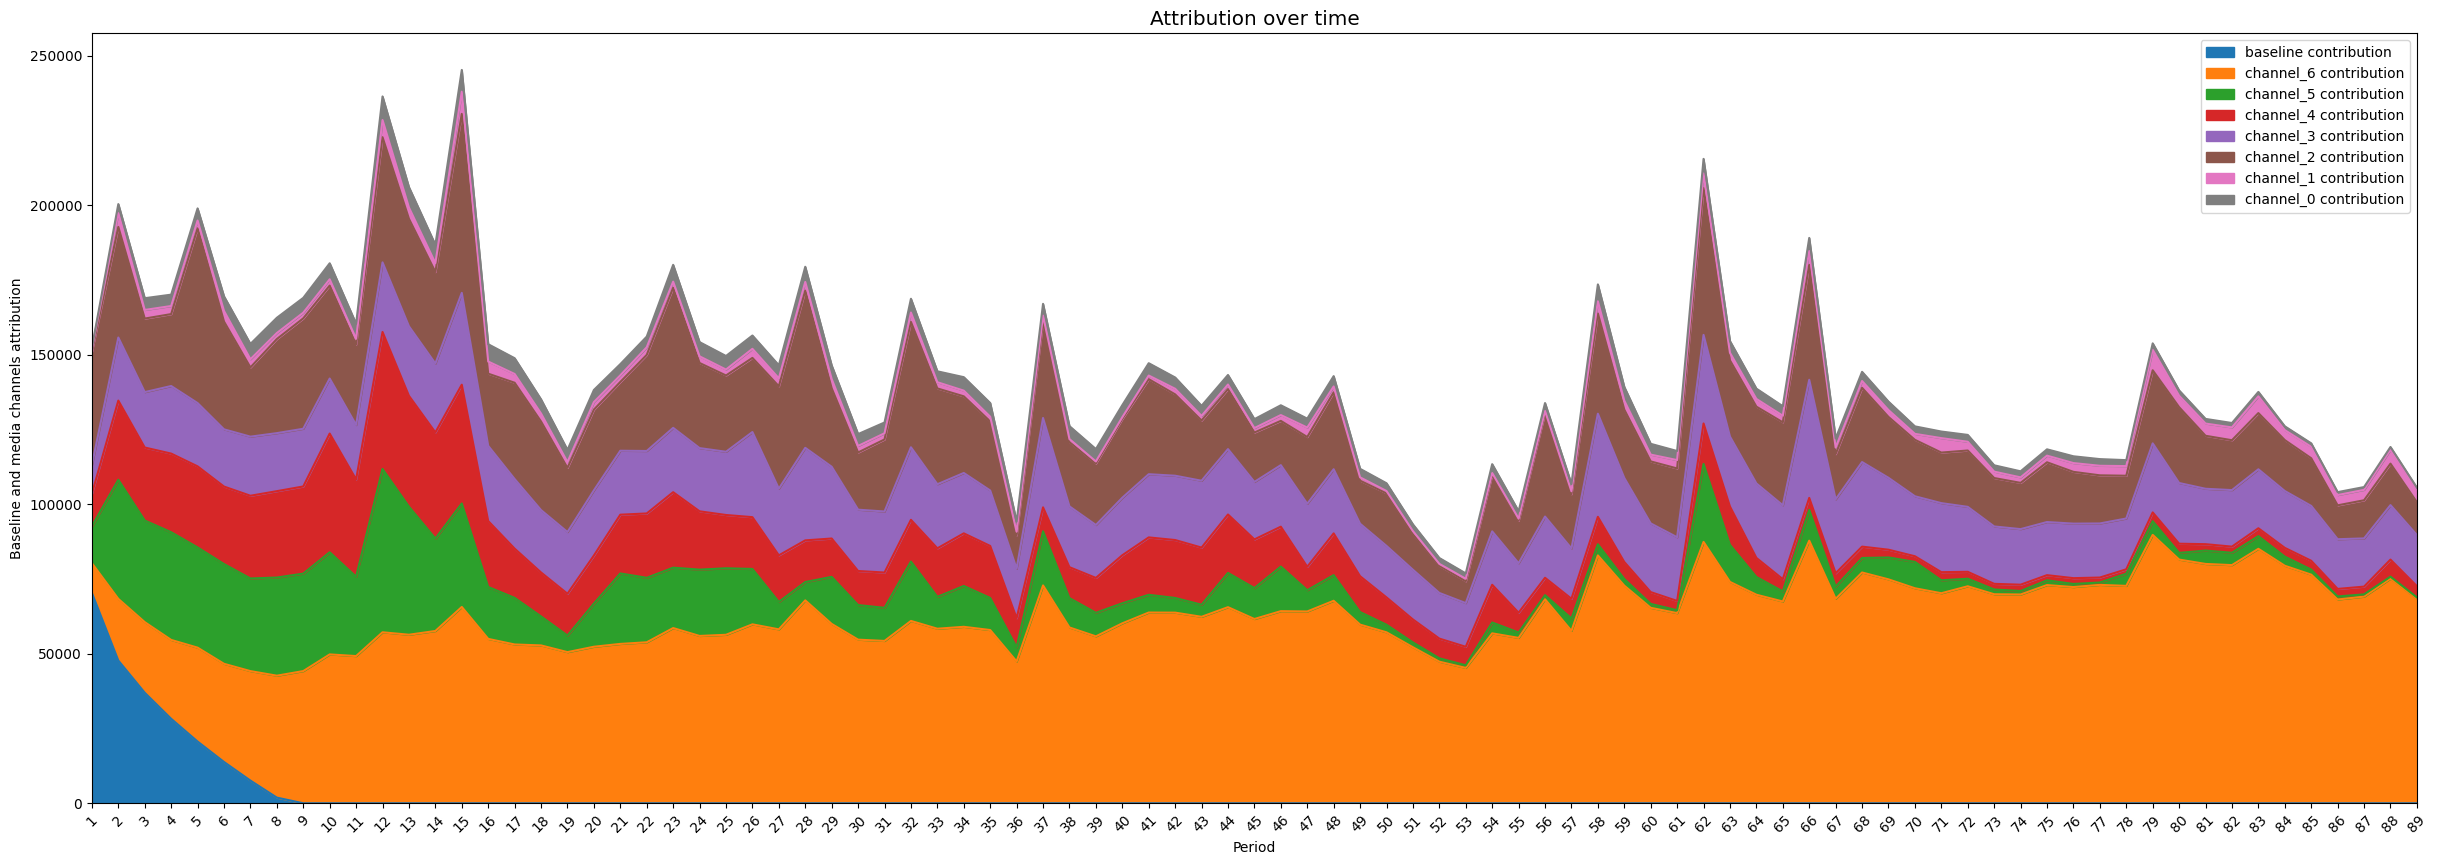

In [16]:
# plot contribution of each channel and baseline
custom_plot_media_baseline_contribution_area_plot(media_mix_model=mmm, target_scaler=target_scaler, fig_size = (30, 10))

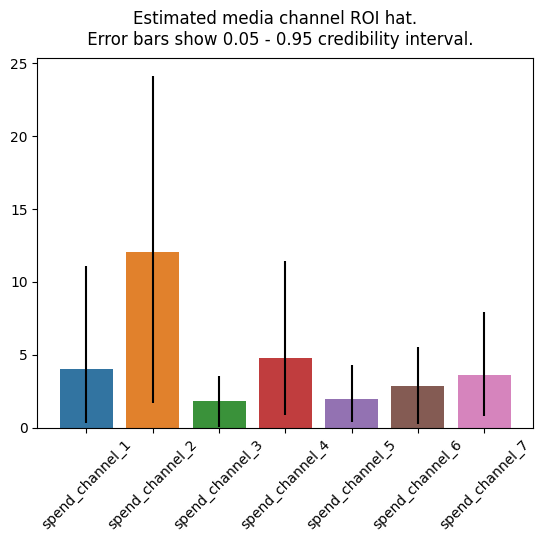

In [17]:
# plot media roi
plot.plot_bars_media_metrics(metric=roi_hat, metric_name="ROI hat", channel_names=channel_names)

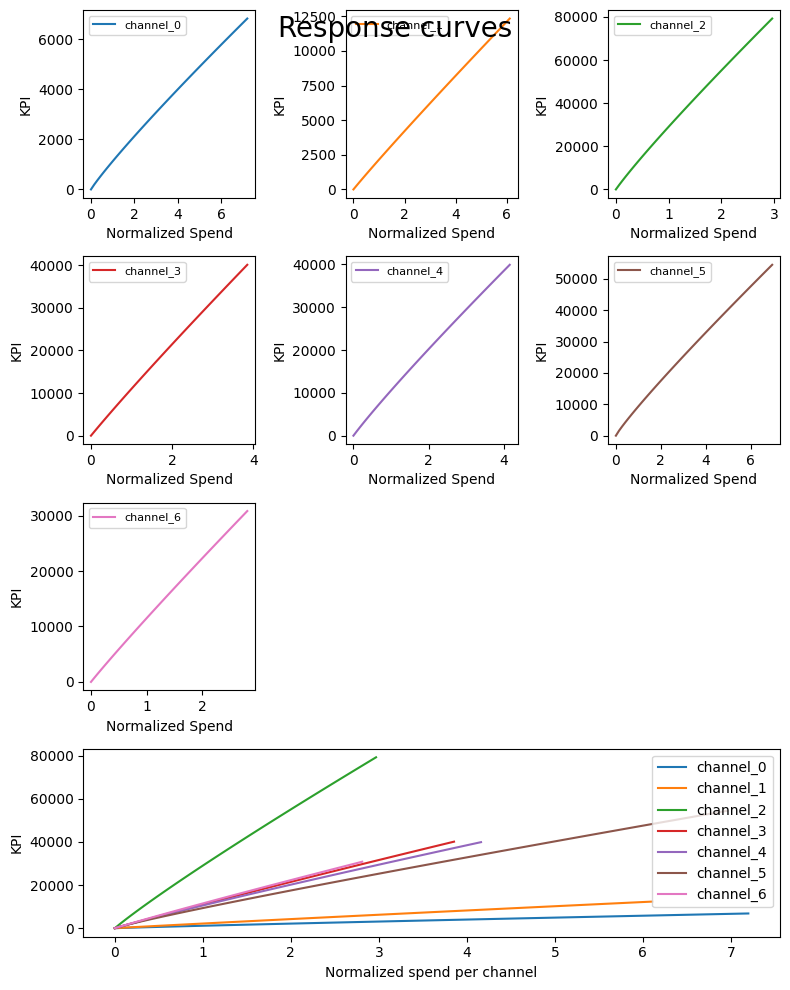

In [18]:
# plot response curves for channels
plot.plot_response_curves(media_mix_model=mmm, target_scaler=target_scaler)

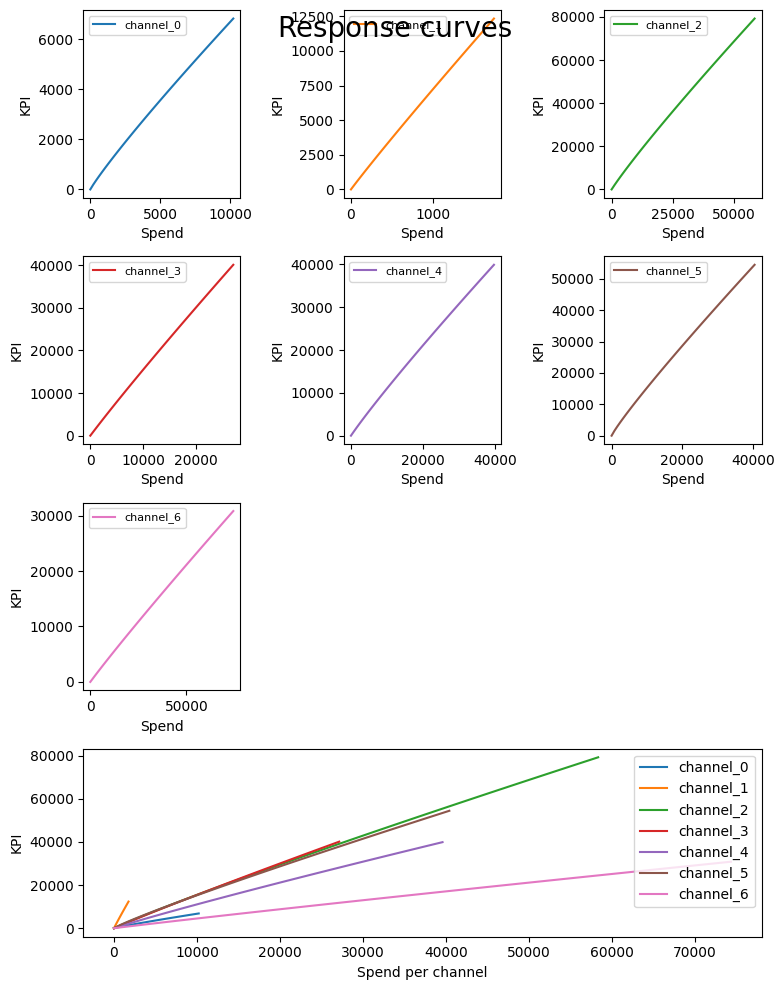

In [19]:
# plot response curves for channels
plot.plot_response_curves(media_mix_model=mmm, target_scaler=target_scaler, media_scaler=media_scaler)

### **Budget** **Optimisation**

In [20]:
# if used impressions for media variables, this should be an array of average CPMs
# if used spend then just put an array of 1s like 
prices = jnp.ones(mmm.n_media_channels)

In [21]:
# starting with the same average weekly budget 
n_time_periods = 10
budget = jnp.sum(media_data.mean(axis=0)) * n_time_periods

In [22]:
# run budget optimization
solution, kpi_without_optim, previous_budget_allocation = optimize_media.find_optimal_budgets(
    n_time_periods=n_time_periods,
    media_mix_model=mmm,
    budget=budget,
    prices=prices,
    media_scaler=media_scaler,
    target_scaler=target_scaler)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -1397422.9906389255
            Iterations: 45
            Function evaluations: 660
            Gradient evaluations: 44


In [23]:
# Obtain the optimal weekly allocation.
optimal_buget_allocation = prices * solution.x
optimal_buget_allocation

DeviceArray([ 17033.139 ,   3435.0557, 230903.55  ,  84553.945 ,
              76164.35  ,  69730.23  , 211702.11  ], dtype=float32)

In [24]:
# Both values should be very close in order to compare KPI
budget, optimal_buget_allocation.sum()

(DeviceArray(693522.4, dtype=float32), DeviceArray(693522.4, dtype=float32))

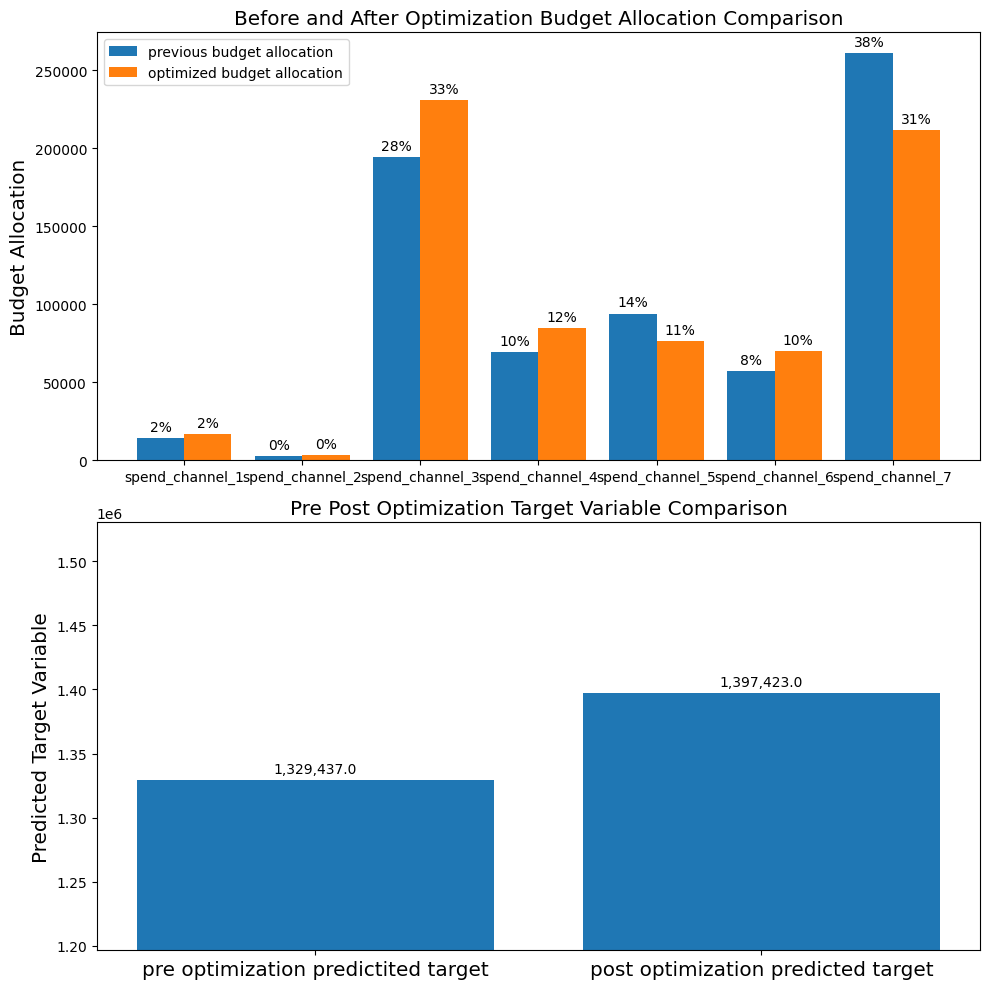

In [25]:
# Plot out pre post optimization budget allocation and predicted target variable comparison.
plot.plot_pre_post_budget_allocation_comparison(media_mix_model=mmm, 
                                                kpi_with_optim=solution['fun'], 
                                                kpi_without_optim=kpi_without_optim,
                                                optimal_buget_allocation=optimal_buget_allocation, 
                                                previous_budget_allocation=previous_budget_allocation, 
                                                channel_names=channel_names,
                                                figure_size=(10,10))